In [ ]:
!pip install torch torchvision pycocotools opencv-python numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!wget http://images.cocodataset.org/zips/val2014.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

--2025-06-23 13:41:26--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.28.124, 3.5.19.149, 52.216.212.193, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.28.124|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  50.6MB/s    in 2m 3s   

2025-06-23 13:43:30 (51.5 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]

--2025-06-23 13:43:30--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.179.155, 52.216.200.27, 3.5.30.83, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.179.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%

In [ ]:
!unzip -q val2014.zip
!unzip -q annotations_trainval2014.zip

In [ ]:
!mkdir main_dataset
!mv val2014 main_dataset/
!mv annotations main_dataset/

In [ ]:
!rm main_dataset/annotations/*train2014.json

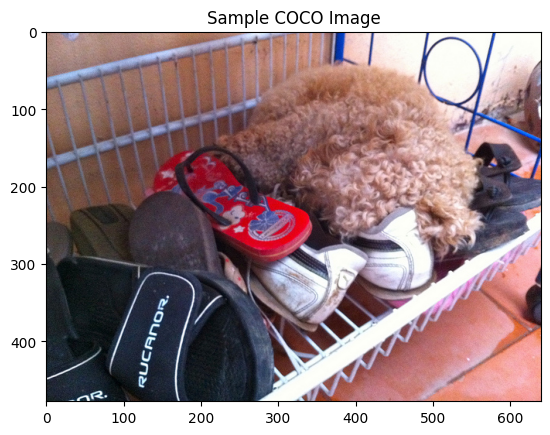

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_path = 'main_dataset/val2014/COCO_val2014_000000000042.jpg'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Sample COCO Image')
plt.show()

In [ ]:
%%writefile simple_split.py
import os
import json
import shutil
import random

# Directories
annotations_dir = 'main_dataset/annotations'
images_dir = 'main_dataset/val2014'
output_base_dir = 'dataset'

# Create output directories
os.makedirs(output_base_dir, exist_ok=True)
for split in ['test']:
    os.makedirs(os.path.join(output_base_dir, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_base_dir, split, 'annotations'), exist_ok=True)

# Load annotations
with open(os.path.join(annotations_dir, 'instances_val2014.json')) as f:
    instances = json.load(f)
image_ids = [img['id'] for img in instances['images']]

# Select 100 images
random.seed(42)
random.shuffle(image_ids)
test_ids = image_ids[:100]

# Copy images and annotations
test_images = [img for img in instances['images'] if img['id'] in test_ids]
test_annotations = [ann for ann in instances['annotations'] if ann['image_id'] in test_ids]
for img in test_images:
    src_img = os.path.join(images_dir, img['file_name'])
    dst_img = os.path.join(output_base_dir, 'test', 'images', img['file_name'])
    if os.path.exists(src_img):
        shutil.copy(src_img, dst_img)
with open(os.path.join(output_base_dir, 'test', 'annotations', 'instances_test2014.json'), 'w') as f:
    json.dump({'images': test_images, 'annotations': test_annotations, 'categories': instances['categories']}, f)

Overwriting simple_split.py


In [ ]:
!python simple_split.py

In [ ]:
import os

# Check images in val2014
val_images = os.listdir('main_dataset/val2014')
print("First 5 images in val2014:", val_images[:5])

# Check images in dataset/test/images (if it exists)
if os.path.exists('dataset/test/images'):
    test_images = os.listdir('dataset/test/images')
    print("First 5 images in test:", test_images[:5])
else:
    print("No test images found.")

First 5 images in val2014: ['COCO_val2014_000000552395.jpg', 'COCO_val2014_000000017003.jpg', 'COCO_val2014_000000210241.jpg', 'COCO_val2014_000000449888.jpg', 'COCO_val2014_000000431832.jpg']
First 5 images in test: ['COCO_val2014_000000206550.jpg', 'COCO_val2014_000000183905.jpg', 'COCO_val2014_000000452013.jpg', 'COCO_val2014_000000006701.jpg', 'COCO_val2014_000000517523.jpg']


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


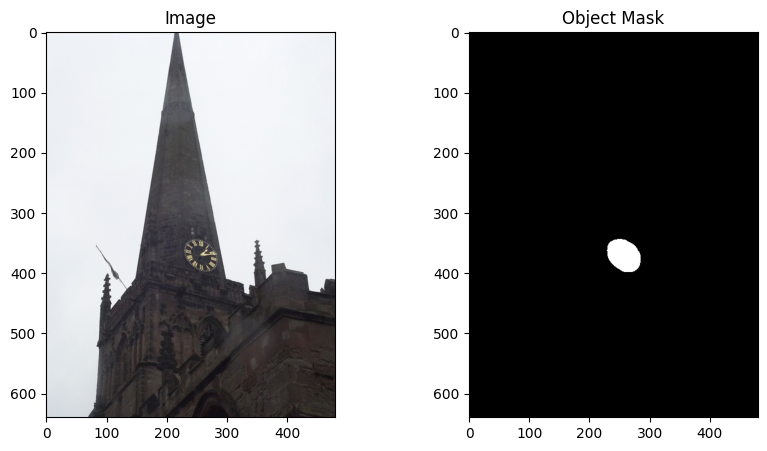

In [ ]:
import torch
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn
import cv2
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import transforms

# Load model
model = maskrcnn_resnet50_fpn(pretrained=True).eval()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

# Load image
img_path = 'dataset/test/images/COCO_val2014_000000206550.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_tensor = transforms.ToTensor()(img_rgb).unsqueeze(0).to(device)

# Predict
with torch.no_grad():
    predictions = model(img_tensor)
masks = predictions[0]['masks'].cpu().numpy()
scores = predictions[0]['scores'].cpu().numpy()

# Show best mask
mask = masks[scores.argmax(), 0] > 0.5
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(img_rgb); plt.title('Image')
plt.subplot(1, 2, 2); plt.imshow(mask, cmap='gray'); plt.title('Object Mask')
plt.show()

# Save mask
from PIL import Image
Image.fromarray(mask.astype(np.uint8) * 255).save('maskrcnn_mask1.png')

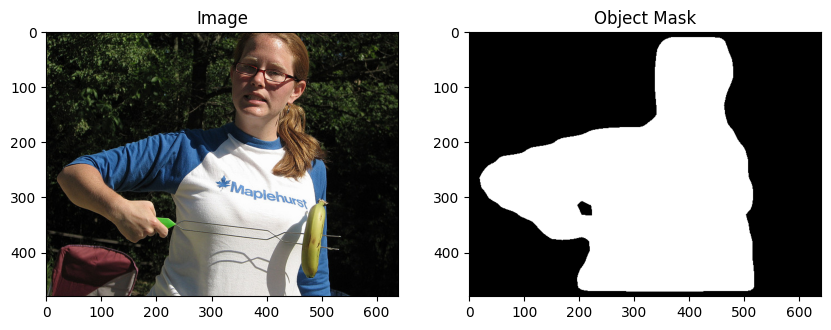

In [ ]:
img_path = 'dataset/test/images/COCO_val2014_000000183905.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_tensor = transforms.ToTensor()(img_rgb).unsqueeze(0).to(device)

# Predict
with torch.no_grad():
    predictions = model(img_tensor)
masks = predictions[0]['masks'].cpu().numpy()
scores = predictions[0]['scores'].cpu().numpy()

# Show best mask
mask = masks[scores.argmax(), 0] > 0.5
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(img_rgb); plt.title('Image')
plt.subplot(1, 2, 2); plt.imshow(mask, cmap='gray'); plt.title('Object Mask')
plt.show()

# Save mask
from PIL import Image
Image.fromarray(mask.astype(np.uint8) * 255).save('maskrcnn_mask2.png')

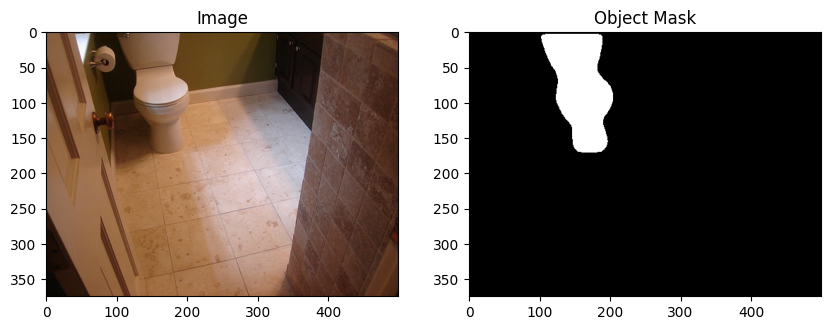

In [ ]:
img_path = 'dataset/test/images/COCO_val2014_000000452013.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_tensor = transforms.ToTensor()(img_rgb).unsqueeze(0).to(device)

# Predict
with torch.no_grad():
    predictions = model(img_tensor)
masks = predictions[0]['masks'].cpu().numpy()
scores = predictions[0]['scores'].cpu().numpy()

# Show best mask
mask = masks[scores.argmax(), 0] > 0.5
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(img_rgb); plt.title('Image')
plt.subplot(1, 2, 2); plt.imshow(mask, cmap='gray'); plt.title('Object Mask')
plt.show()

# Save mask
from PIL import Image
Image.fromarray(mask.astype(np.uint8) * 255).save('maskrcnn_mask3.png')


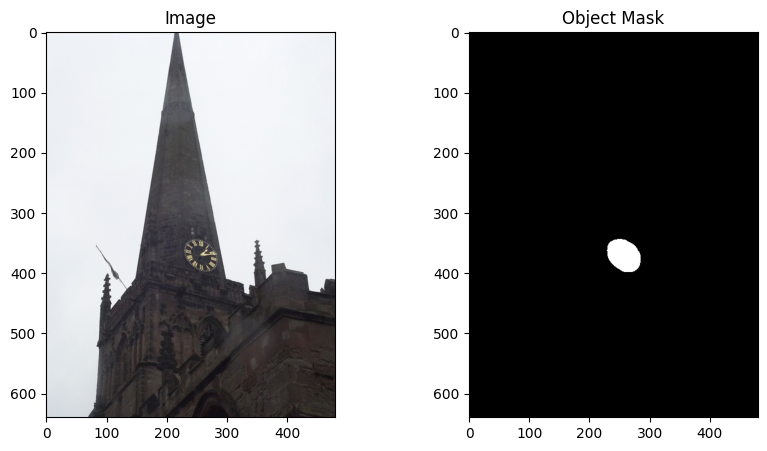

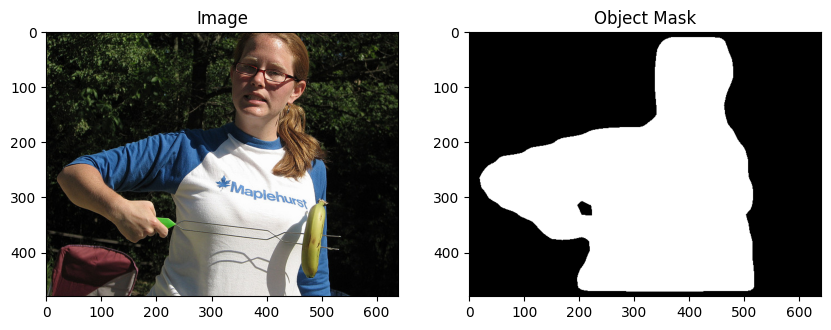

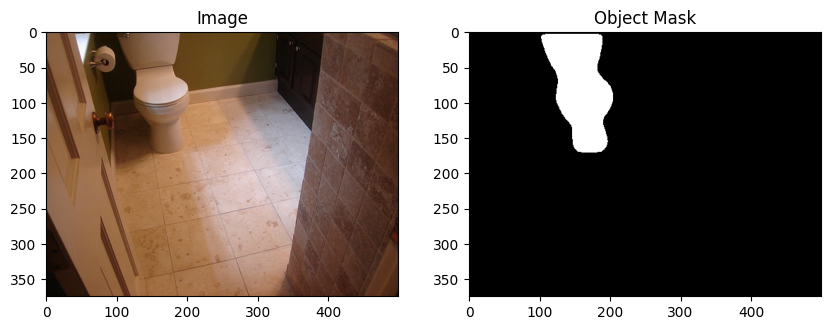

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Show all 3 results
for i, img_name in enumerate(['COCO_val2014_000000206550.jpg', 'COCO_val2014_000000183905.jpg', 'COCO_val2014_000000452013.jpg']):
    img_path = f'dataset/test/images/{img_name}'
    mask_path = f'maskrcnn_mask{i+1}.png'
    img = cv2.imread(img_path)
    mask = np.array(Image.open(mask_path))
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title('Image')
    plt.subplot(1, 2, 2); plt.imshow(mask, cmap='gray'); plt.title('Object Mask')
    plt.show()

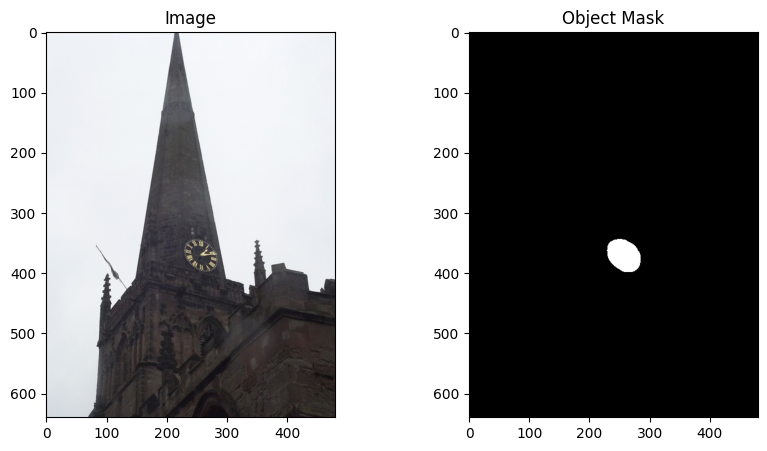

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Get list of test images
test_images = os.listdir('dataset/test/images')
if test_images:
    img_path = f'dataset/test/images/{test_images[0]}'
    mask_path = f'dataset/test/masks/mask_{test_images[0]}.png'  # Added .png
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image: {img_path}")
    else:
        try:
            mask = np.array(Image.open(mask_path))
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title('Image')
            plt.subplot(1, 2, 2); plt.imshow(mask, cmap='gray'); plt.title('Object Mask')
            plt.show()
        except:
            print(f"Failed to load mask: {mask_path}")
else:
    print("No test images found.")

In [ ]:
import os
mask_files = os.listdir('dataset/test/masks')
print("Masks created:", mask_files[:10])

Masks created: ['mask_COCO_val2014_000000006701.jpg.png', 'mask_COCO_val2014_000000130613.jpg.png', 'mask_COCO_val2014_000000195002.jpg.png', 'mask_COCO_val2014_000000144379.jpg.png', 'mask_COCO_val2014_000000517523.jpg.png', 'mask_COCO_val2014_000000198004.jpg.png', 'mask_COCO_val2014_000000452013.jpg.png', 'mask_COCO_val2014_000000206550.jpg.png', 'mask_COCO_val2014_000000183905.jpg.png', 'mask_COCO_val2014_000000519329.jpg.png']
